<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/300_Python_Regressao_Linear_Classificacao_Regress%C3%A3o_de_Dados_de_Vendas_de_Im%C3%B3veis_nos_Estados_Unidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando o Dataset de Casas na California

## Download: https://archive.ics.uci.edu/ml/datasets/Housing

In [1]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
#from sklearn.datasets import load_boston
boston = fetch_california_housing()

In [4]:
# Verificando o tipo da variável boston
type(boston)

sklearn.utils._bunch.Bunch

In [5]:
# Visualizando o shape do dataset, neste caso 20640 instâncias (linhas) e 08 atributos (colunas)
boston.data.shape

(20640, 8)

In [6]:
# Descrição do Dataset
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# boston.target é uma array com o preço das casas 
boston.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Prevendo o preço das casas em Boston

### Y - variável dependente (preço das casas em Boston)
### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [12]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [13]:
# Não queremos o preço da casa como variável dependente
X = df.drop('PRICE', axis = 1)

In [14]:
# Definindo Y
Y = df.PRICE

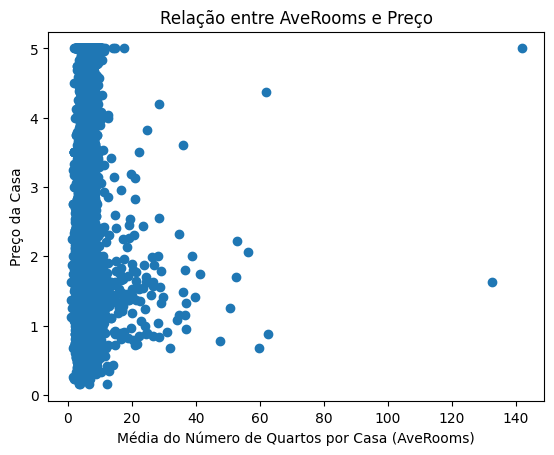

In [15]:
plt.scatter(df.AveRooms, Y)
plt.xlabel("Média do Número de Quartos por Casa (AveRooms)")
plt.ylabel("Preço da Casa")
plt.title("Relação entre AveRooms e Preço")
plt.show()

In [16]:
# Criando o objeto de regressão linear
regr = LinearRegression()
regr

LinearRegression()

In [17]:
# Tipo do objeto
type(regr)

sklearn.linear_model._base.LinearRegression

In [18]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression()

In [19]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficiente: ", len(regr.coef_))

Coeficiente:  -36.94192020718441
Número de Coeficiente:  8


In [20]:
# Prevendo o preço da casa
regr.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

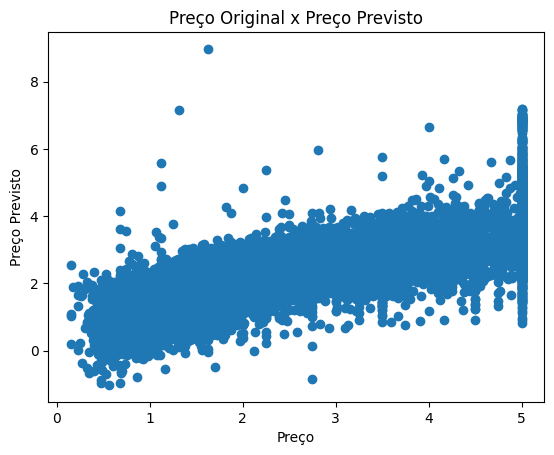

In [21]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

### Podemos ver que existem alguns erros na predição do preço das casas

In [22]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

0.5243209861846072


In [23]:
# Aplicando regressõa linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['AveRooms']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['AveRooms']])) ** 2)
print(mse2)

1.3008070902505422


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.

### Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos:

In [24]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(20590, 8) (50, 8) (20590,) (50,)


### Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [27]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(13828, 8) (6812, 8) (13828,) (6812,)


In [28]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [29]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression()

In [30]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

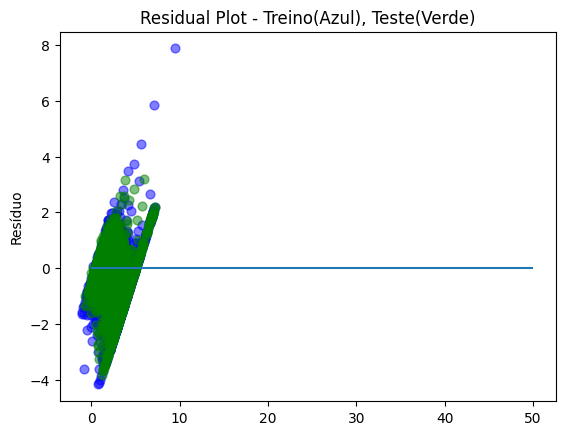

In [31]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()